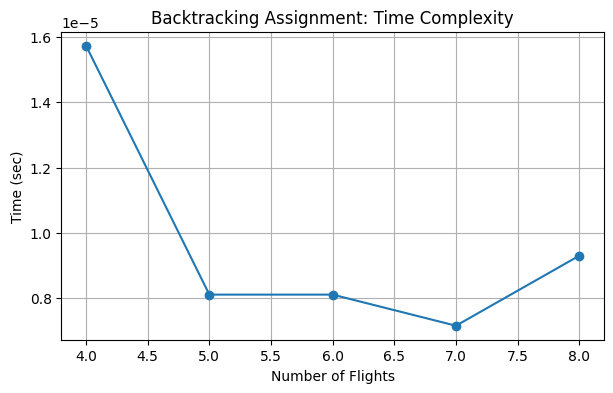

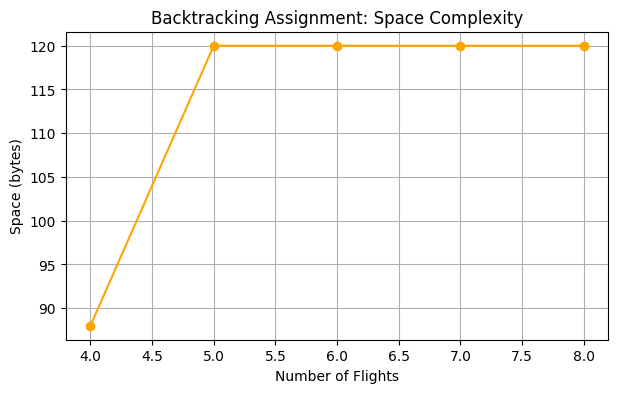

In [6]:
import time, sys, random
import matplotlib.pyplot as plt

def flights_overlap(f1, f2, min_rest=0):
    s1,e1 = f1[1], f1[2]
    s2,e2 = f2[1], f2[2]
    if e1 + min_rest <= s2 or e2 + min_rest <= s1:
        return False
    return True

def can_assign(schedule, flight, min_rest=1):
    for f in schedule:
        if flights_overlap(f, flight, min_rest):
            return False
    return True

def backtracking_assign(flights, crews, min_rest=1):
    flights = sorted(flights, key=lambda x: x[1])
    assignments = {c: [] for c in crews}

    def solve(i):
        if i == len(flights):
            return True
        f = flights[i]
        for c in crews:
            if can_assign(assignments[c], f, min_rest):
                assignments[c].append(f)
                if solve(i+1):
                    return True
                assignments[c].pop()
        return False

    success = solve(0)
    return assignments, success

# ---------------------------
# TIME & SPACE TESTING
# ---------------------------
sizes = [4, 5, 6, 7, 8]
times = []
spaces = []

def generate_flights(n):
    out = []
    for i in range(n):
        s = random.randint(6, 18)
        e = s + random.randint(1, 3)
        out.append((f"F{i+1}", s, e))
    return out

crews = ["C1","C2","C3"]

for n in sizes:
    flights = generate_flights(n)

    start = time.time()
    result, ok = backtracking_assign(flights, crews)
    end = time.time()

    times.append(end - start)
    spaces.append(sys.getsizeof(flights))

# ---- TIME GRAPH ----
plt.figure(figsize=(7,4))
plt.plot(sizes, times, marker='o')
plt.title("Backtracking Assignment: Time Complexity")
plt.xlabel("Number of Flights"); plt.ylabel("Time (sec)")
plt.grid(True); plt.show()

# ---- SPACE GRAPH ----
plt.figure(figsize=(7,4))
plt.plot(sizes, spaces, marker='o', color="orange")
plt.title("Backtracking Assignment: Space Complexity")
plt.xlabel("Number of Flights"); plt.ylabel("Space (bytes)")
plt.grid(True); plt.show()
